In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image analysis

In [4]:
img = cv2.imread('sample.jpg')
img.shape

(720, 1280, 3)

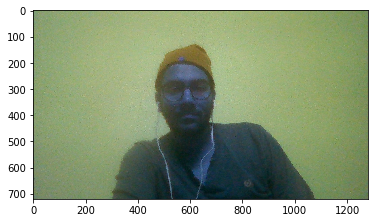

In [5]:
plt.imshow(img)

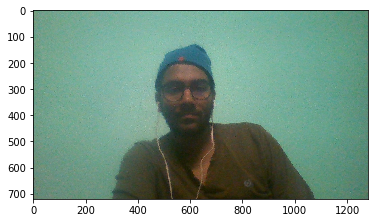

In [6]:
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.imshow(img_copy)

In [17]:
# upper right corner pixel value
lower_bound = img_copy[0,0]
print(lower_bound)

[101 154 136]


In [18]:
# middle upper background pixel value
upper_bound = img_copy[img.shape[1]//2, 50]
print(upper_bound)

[107 142 118]


### The Mask

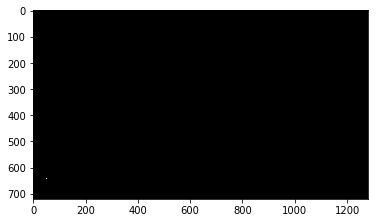

In [21]:
mask = cv2.inRange(img_copy, lower_bound, upper_bound)

plt.imshow(mask, cmap='gray')

Very bad mask

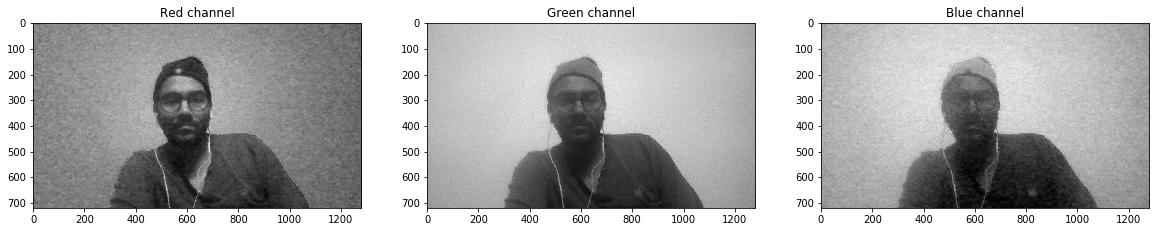

In [23]:
r = img_copy[: ,: ,0]
g = img_copy[: ,: ,1]
b = img_copy[: ,: ,2]

_ , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red channel')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green channel')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue channel')
ax3.imshow(b, cmap='gray')

>Red and Blue channels have lot of noise. <br/>
Green channel seems to be quite consistent.<br/>
Let's try using green channel as mask

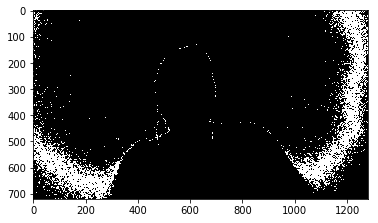

In [34]:
low = np.array([50, 145, 50])
up = np.array([250, 154, 250])

mask_gr = cv2.inRange(img_copy, low, up)
plt.imshow(mask_gr, cmap='gray')

RGB values can't be used for removing this backgroud(at least), if image was well lit and and no gradient then it might have worked.<br/>
Let's try using hsv color palate now

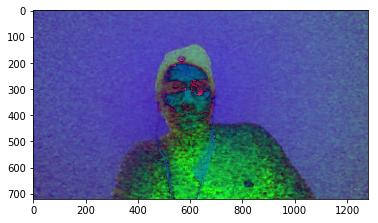

In [39]:
img_hsv = cv2.cvtColor(img_copy, cv2.COLOR_RGB2HSV)

plt.imshow(img_hsv)

check individual hsv channels

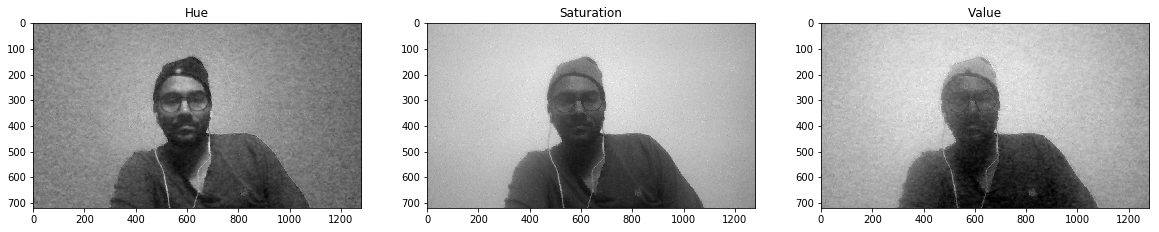

In [41]:
h = img_hsv[: ,: ,0]
s = img_hsv[: ,: ,1]
v = img_hsv[: ,: ,2]

_ , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(r, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(g, cmap='gray')

ax3.set_title('Value')
ax3.imshow(b, cmap='gray')